# Sentiment Analysis Project 1: Exploring Customer Sentiments in McDonald's US Store Reviews

# Introduction
This Jupyter notebook focuses on analyzing customer reviews for McDonald's stores. The aim is to perform data cleaning, conduct sentiment analysis, and visualize the sentiment distribution among the reviews. The insights gained from this analysis will help in understanding customer satisfaction and identifying areas for improvement.


# Data Loading
In this section, we load the McDonald's reviews dataset into a pandas DataFrame. The dataset contains various fields including store information, review texts, and ratings. Special attention is given to handling encoding issues to ensure that all textual data is correctly imported.


In [28]:
import pandas as pd

# Attempt to load the CSV with a common alternative encoding
reviews_df = pd.read_csv('McDonald_s_Reviews.csv', encoding='ISO-8859-1')


print(reviews_df.head())  # Display the first few rows of the DataFrame


   reviewer_id  store_name              category  \
0            1  McDonald's  Fast food restaurant   
1            2  McDonald's  Fast food restaurant   
2            3  McDonald's  Fast food restaurant   
3            4  McDonald's  Fast food restaurant   
4            5  McDonald's  Fast food restaurant   

                                       store_address  latitude   longitude  \
0  13749 US-183 Hwy, Austin, TX 78750, United States  30.460718 -97.792874   
1  13749 US-183 Hwy, Austin, TX 78750, United States  30.460718 -97.792874   
2  13749 US-183 Hwy, Austin, TX 78750, United States  30.460718 -97.792874   
3  13749 US-183 Hwy, Austin, TX 78750, United States  30.460718 -97.792874   
4  13749 US-183 Hwy, Austin, TX 78750, United States  30.460718 -97.792874   

  rating_count   review_time  \
0        1,240  3 months ago   
1        1,240    5 days ago   
2        1,240    5 days ago   
3        1,240   a month ago   
4        1,240  2 months ago   

                         

# Data Inspection
After loading the dataset, we conduct an initial inspection to understand its structure. This includes examining the number of entries, identifying the columns relevant to our analysis (such as the review text and store details), and checking for missing or inconsistent data that might require cleaning.


In [31]:
data_info = {
    "Shape": reviews_df.shape,
    "Columns": reviews_df.columns.tolist(),
    "Data Types": reviews_df.dtypes,
    "Missing Values": reviews_df.isnull().sum()
}


In [41]:
data_info

{'Shape': (33396, 10),
 'Columns': ['reviewer_id',
  'store_name',
  'category',
  'store_address',
  'latitude ',
  'longitude',
  'rating_count',
  'review_time',
  'review',
  'rating'],
 'Data Types': reviewer_id        int64
 store_name        object
 category          object
 store_address     object
 latitude         float64
 longitude        float64
 rating_count      object
 review_time       object
 review            object
 rating            object
 dtype: object,
 'Missing Values': reviewer_id        0
 store_name         0
 category           0
 store_address      0
 latitude         660
 longitude        660
 rating_count       0
 review_time        0
 review             0
 rating             0
 dtype: int64}

# Data Cleaning and Preprocessing
This critical step involves preparing the dataset for analysis. We clean the review texts by removing irrelevant characters (such as punctuation and numbers), normalize the text (converting to lowercase), and filter out common stopwords. These preprocessing steps are essential for effective sentiment analysis.


In [32]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
ENGLISH_STOP_WORDS = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\imtya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [33]:
import re  # Add this line to import the 're' module

def clean_text(text):
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    text = re.sub(r'\@\w+|\#','', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text_tokens = text.split()
    filtered_words = [word for word in text_tokens if word.lower() not in ENGLISH_STOP_WORDS]
    return " ".join(filtered_words).lower()

# Assuming reviews_df is your DataFrame and 'review' is the column you want to clean
reviews_df['clean_review'] = reviews_df['review'].apply(clean_text)



In [34]:
pip install textblob


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


# Sentiment Analysis
Using the cleaned review texts, we apply sentiment analysis to classify each review as positive, negative, or neutral. This process utilizes the TextBlob library, which provides a simple API for determining sentiment polarity. The outcome of this analysis will offer a high-level overview of customer sentiment across the reviews.


In [35]:
from textblob import TextBlob

def analyze_sentiment(text):
    analysis = TextBlob(text)
    polarity = analysis.sentiment.polarity
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Make sure reviews_df and the 'clean_review' column exist
reviews_df['sentiment'] = reviews_df['clean_review'].apply(analyze_sentiment)


# Analyzing Sentiment Distribution
With the sentiments of individual reviews classified, we aggregate this information to examine the overall distribution of sentiments across the dataset. This analysis helps in quantifying the proportions of positive, negative, and neutral reviews, providing insight into the general customer satisfaction.


In [36]:
sentiment_distribution = reviews_df['sentiment'].value_counts(normalize=True) * 100


In [37]:
print(sentiment_distribution)

Positive    57.255360
Negative    27.961433
Neutral     14.783208
Name: sentiment, dtype: float64


# Visualization of Sentiment Distribution
To better communicate the results of our sentiment analysis, we create visualizations using libraries such as matplotlib and seaborn. Bar charts are particularly effective in showcasing the distribution of sentiments, allowing for an intuitive understanding of the data at a glance.


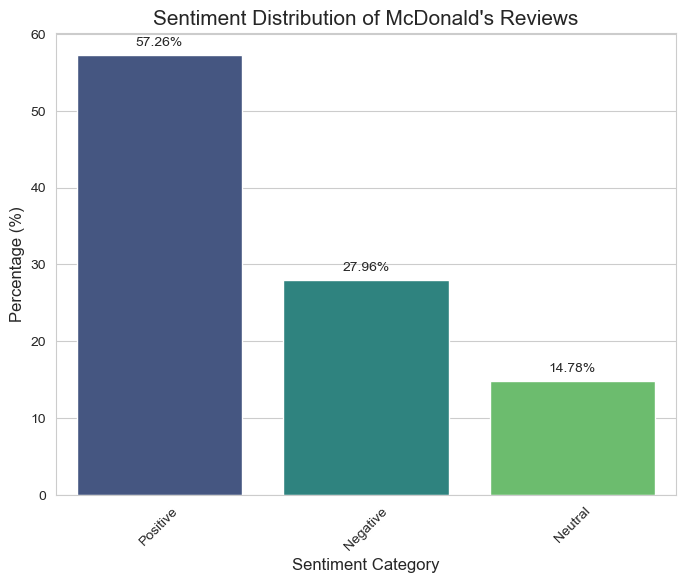

In [38]:
# Create a bar plot for sentiment distribution
plt.figure(figsize=(8, 6))
barplot = sns.barplot(x=sentiment_distribution.index, y=sentiment_distribution.values, palette="viridis")

# Add title and labels to the plot
plt.title('Sentiment Distribution of McDonald\'s Reviews', fontsize=15)
plt.xlabel('Sentiment Category', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.xticks(rotation=45)  # Rotate labels to improve readability

# Annotate each bar with the percentage value
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.2f') + '%', 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 9), 
                     textcoords = 'offset points')

# Display the plot
plt.show()


# Additional Analyses
Beyond sentiment analysis, we explore additional aspects of the dataset, such as identifying stores with the highest number of negative or positive reviews. This deeper dive can uncover specific locations that may require attention or are excelling in customer satisfaction.
Top 5

In [39]:
# Filter the DataFrame for reviews classified as 'Positive'
positive_reviews_df = reviews_df[reviews_df['sentiment'] == 'Positive']

# Group the positive reviews by 'store_name' and 'store_address' to uniquely identify each store
positive_review_counts = positive_reviews_df.groupby(['store_name', 'store_address'])['review'].count()

# Sort the counts in descending order to find the top 5 stores with the most positive reviews
top_stores_positive_reviews = positive_review_counts.sort_values(ascending=False).head(5)

# Display the top 5 stores with their positive review counts
print(top_stores_positive_reviews)


store_name  store_address                                                         
McDonald's  1415 E State Rd, Fern Park, FL 32730, United States                       1050
            632 S R L Thornton Freeway Service Rd, Dallas, TX 75203, United States    1026
            10901 Riverside Dr, North Hollywood, CA 91602, United States               975
            5725 W Irlo Bronson Memorial Hwy, Kissimmee, FL 34746, United States       959
            9814 International Dr, Orlando, FL 32819, United States                    958
Name: review, dtype: int64


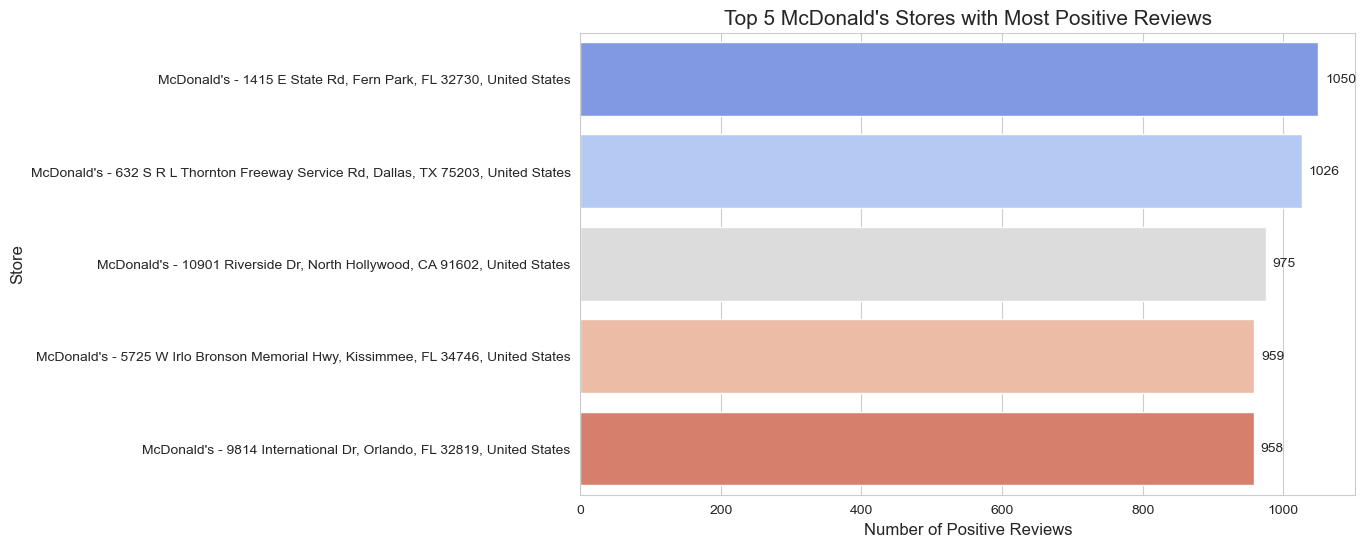

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare the data for plotting
top_stores_positive_reviews_df = top_stores_positive_reviews.reset_index()
top_stores_positive_reviews_df['store_info'] = top_stores_positive_reviews_df['store_name'] + " - " + top_stores_positive_reviews_df['store_address']

# Create the horizontal bar plot
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x=top_stores_positive_reviews_df['review'], y=top_stores_positive_reviews_df['store_info'], palette='coolwarm')

# Add title and labels
plt.title('Top 5 McDonald\'s Stores with Most Positive Reviews', fontsize=15)
plt.xlabel('Number of Positive Reviews', fontsize=12)
plt.ylabel('Store', fontsize=12)

# Annotate each bar with the number of positive reviews
for p in barplot.patches:
    width = p.get_width()
    plt.text(width + 10,  # x-coordinate position of text
             p.get_y() + p.get_height() / 2,  # y-coordinate position of text
             '{:1.0f}'.format(width),  # text
             va='center')  # center alignment

# Display the plot
plt.show()


# Conclusion
The conclusion summarizes the key findings from our analysis, highlighting the overall sentiment trends and any notable patterns identified in the review data. Based on these insights, we may suggest potential areas for improvement or further investigation to enhance customer experience at McDonald's stores.
